The Big Picture: Linear Regression Is One Idea in Three Forms

1. Algebraic form :   y^ = mx + b

2. Geometric form :   𝑦^ = projection of 𝑦 onto 𝑥

3. Optimization form Minimize: 

![image](mathmatic/L.jpg)

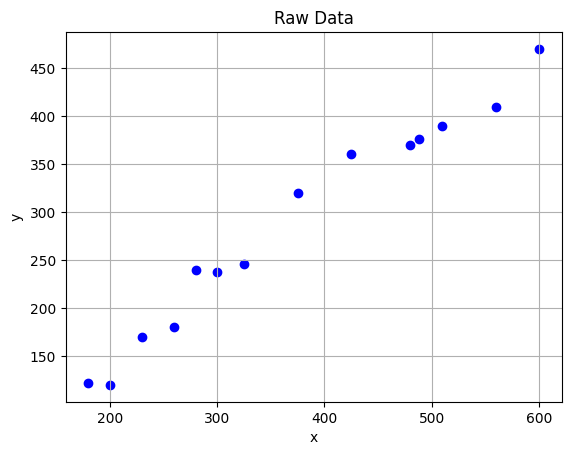

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Raw data
x = np.array([180, 200, 230, 260, 280, 300, 325, 375, 425, 480, 488, 510, 560, 600])
y = np.array([122, 120, 170, 180, 240, 238, 246, 320, 361, 370, 376, 390, 410, 470])

plt.scatter(x, y, color='blue')
plt.title("Raw Data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


#  2 Centering & Normalizing x:

Concept
- Centering moves the cloud so its mean is at 0
- Normalization scales x so its spread is 1
- Gradient descent behaves much better when features are normalized

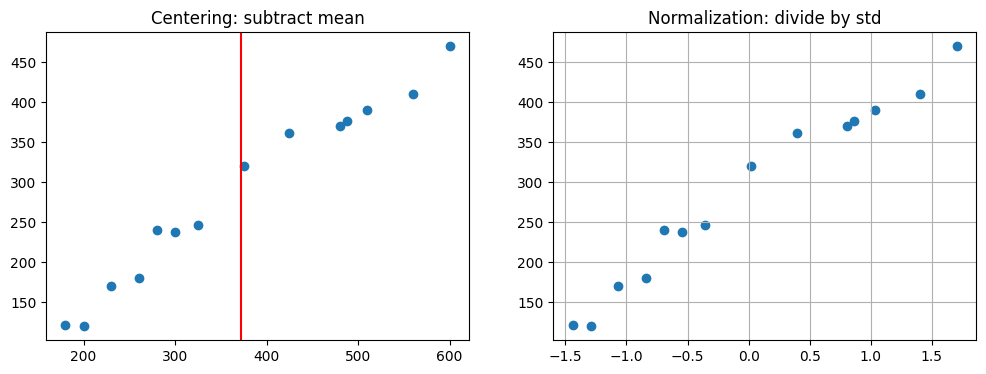

In [2]:
x_mean = x.mean()
x_std = x.std()

x_center = x - x_mean
x_norm = x_center / x_std

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(x, y)
plt.axvline(x_mean, color='red')
plt.title("Centering: subtract mean")

plt.subplot(1,2,2)
plt.scatter(x_norm, y)
plt.title("Normalization: divide by std")
plt.grid(True)

plt.show()


3. Gradient Descent on Normalized x

In [3]:
m = np.random.randn()
c = np.random.randn()
lr = 0.01

loss_history = []

for epoch in range(250):
    y_pred = m * x_norm + c
    error = y_pred - y

    dm = (2 * (error * x_norm)).mean()
    dc = (2 * error).mean()

    m -= lr * dm
    c -= lr * dc

    loss_history.append((error**2).mean())


## Concept 
**Minimize** : 

![image](mathmatic/L.jpg)

**Gradients** :

![image](mathmatic/gradients.jpg)

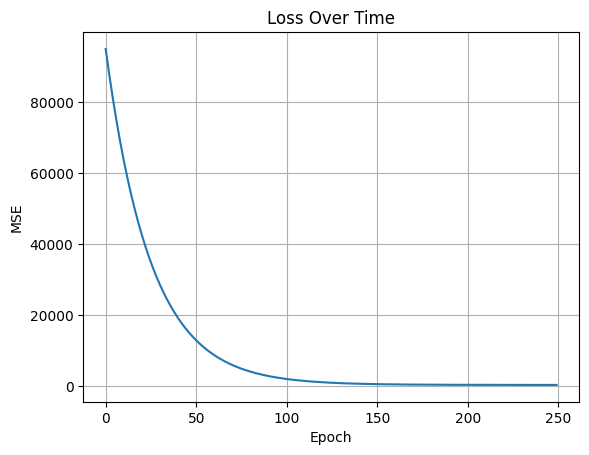

In [4]:
#Loss curve
plt.plot(loss_history)
plt.title("Loss Over Time")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

**Concept**
Loss decreases smoothly because normalization stabilizes the optimization.

5. Convert Back to Real Slope & Intercept

![image](mathmatic\real_slop.jpg)

In [5]:
m_real = m / x_std
c_real = c - m_real * x_mean

print("Learned slope m:", m_real)
print("Learned intercept c:", c_real)


Learned slope m: 0.8016377575398185
Learned intercept c: -13.697780971541306


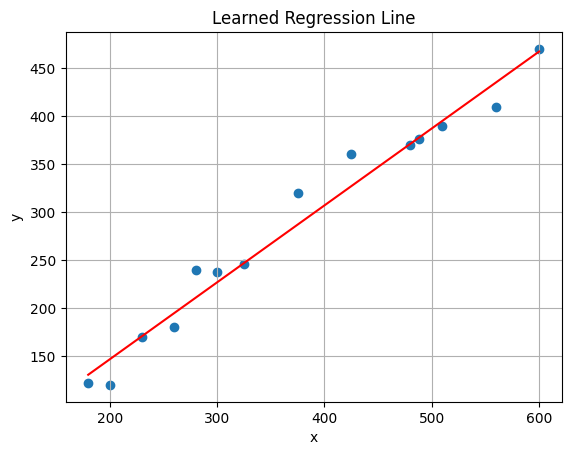

In [6]:
# 6. Plot Learned Regression Line
plt.scatter(x, y)

plt.plot(x, m_real * x + c_real, color='red')
plt.title("Learned Regression Line")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()



## 7. The Projection Formula (Closed‑Form Solution)
Now compute the slope using pure geometry.

![projection](mathmatic\projection_formula.jpg)

This is the exact solution gradient descent is trying to reach.

In [7]:
x_center = x - x_mean
y_center = y - y.mean()

w_proj = (x_center * y_center).sum() / (x_center**2).sum()
c_proj = y.mean() - w_proj * x_mean

print("Projection slope:", w_proj)
print("Projection intercept:", c_proj)


Projection slope: 0.8068057356874964
Projection intercept: -13.77702143849416


In [8]:
# 8. Compare Gradient Descent vs Projection
print("GD slope:", m_real)
print("Projection slope:", w_proj)


GD slope: 0.8016377575398185
Projection slope: 0.8068057356874964


## 9. Residuals, Correlation, and R²
Concepts
Correlation = cosine similarity between centered x and y

R² = cosine²

MSE = squared length of residual vector

Geometrically:

𝑦 = 𝑦^ + 𝑟

where: 
- 𝑦^ is the projection 
- 𝑟 is orthogonal residual

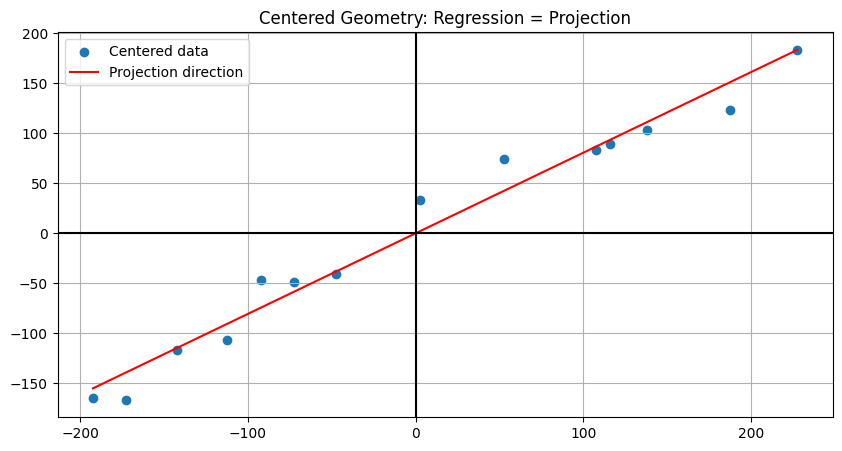

In [9]:
#10 visulizing Projection Geometry

plt.figure(figsize=(10,5))
plt.scatter(x_center, y_center, label="Centered data")
plt.plot(x_center, w_proj * x_center, color='red', label="Projection direction")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.legend()
plt.title("Centered Geometry: Regression = Projection")
plt.grid(True)
plt.show()


Concept
Once centered:

x becomes a direction vector

y is projected onto that direction

the slope is the scalar needed to align x with y

### Summary

- Centering moves the cloud to the origin.
- Normalization scales x to unit variance.
- Gradient descent learns m and c by minimizing MSE.
- Projection formula gives the exact slope in one step.
- Correlation is cosine similarity between centered x and y.
- R² is the squared cosine.
- MSE is the squared length of the residual vector.
- Gradient descent and projection converge to the same line.
